# Basic CNN Model

## Practice. Fashion image classification

### Import package, dataset

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

fmnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fmnist.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


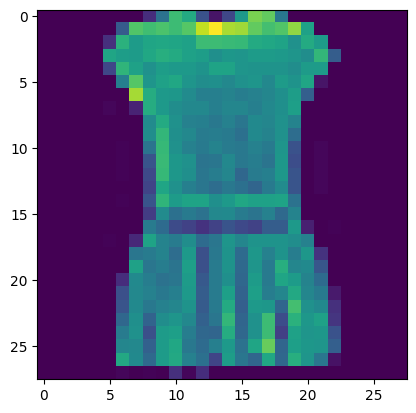

In [9]:
plt.imshow(x_train[3])

### Data preprocessing

normalization

In [10]:
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

print(np.max(np.max(x_train_scaled)), np.min(np.min(x_train_scaled)))
print(np.max(np.max(x_test_scaled)), np.min(np.min(x_test_scaled)))

1.0 0.0
1.0 0.0


dimension matching for CNN

In [11]:
x_train_scaled = x_train_scaled.reshape(-1, 28, 28, 1)
x_test_scaled = x_test_scaled.reshape(-1, 28, 28, 1)

print(x_train_scaled.shape)

(60000, 28, 28, 1)


one-hot encoding

In [12]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

print(y_train[0:5])
print(y_train_onehot[0:5])

[9 0 0 3 0]
[[0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


### keras sequential API

In [25]:
from keras import layers, models

# input_shape = (28, 28, 1)
# cnn_seq = models.Sequential()

# cnn_seq.add(layers.Conv2D(32, (3,3), padding='same', input_shape=input_shape))
# cnn_seq.add(layers.BatchNormalization())
# cnn_seq.add(layers.Activation('relu'))
# cnn_seq.add(layers.MaxPooling2D((2, 2)))

# cnn_seq.add(layers.Conv2D(64, (3,3), padding='same'))
# cnn_seq.add(layers.BatchNormalization())
# cnn_seq.add(layers.Activation('relu'))
# cnn_seq.add(layers.MaxPooling2D((2, 2)))

# cnn_seq.add(layers.Conv2D(128, (3,3), padding='same'))
# cnn_seq.add(layers.BatchNormalization())
# cnn_seq.add(layers.Activation('relu'))
# cnn_seq.add(layers.Flatten())

# cnn_seq.add(layers.Dense(units=128, activation='relu'))
# cnn_seq.add(layers.Dropout(0, 5))

# cnn_seq.add(layers.Dense(units=10, activation='softmax'))

In [17]:
# cnn_seq.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
# cnn_seq.summary()

In [18]:
# 주의: epoch 당 1분, 거의 50분 소요됨
# history = cnn_seq.fit(x_train_scaled, y_train_onehot, validation_data=[x_test_scaled, y_test_onehot], epochs = 10)

In [19]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Classification Accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [20]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

### keras functional API

In [27]:
input_shape = (28, 28, 1)

input = layers.Input(shape=input_shape)
conv1_1 = layers.Conv2D(32, (3,3), padding='same')(input)
conv1_2 = layers.BatchNormalization()(conv1_1)
conv1_3 = layers.Activation('relu')(conv1_2)
conv1_4 = layers.MaxPooling2D((2, 2))(conv1_3)

conv2_1 = layers.Conv2D(64, (3,3), padding='same')(conv1_4)
conv2_2 = layers.BatchNormalization()(conv2_1)
conv2_3 = layers.Activation('relu')(conv2_2)
conv2_4 = layers.Dropout(0, 2)(conv2_3)
conv2_5 = layers.MaxPooling2D((2, 2))(conv2_4)

conv3_1 = layers.Conv2D(128, (3,3), padding='same')(conv2_5)
conv3_2 = layers.BatchNormalization()(conv3_1)
conv3_3 = layers.Activation('relu')(conv3_2)
flattened = layers.Flatten()(conv3_3)

dense = layers.Dense(128, activation='relu')(flattened)
dropout = layers.Dropout(0, 5)(dense)

output = layers.Dense(10, activation='softmax')(dropout)

cnn_func = models.Model(input, output)

In [28]:
cnn_func.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_func.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        1849

In [29]:
# 주의: epoch 당 1분, 거의 50분 소요됨
history = cnn_func.fit(x_train_scaled, y_train_onehot, validation_data=[x_test_scaled, y_test_onehot], epochs = 30)

Epoch 1/30
1875/1875 [==============================] - 189s 100ms/step - loss: 0.3623 - accuracy: 0.8686 - val_loss: 0.4839 - val_accuracy: 0.8423
Epoch 2/30
1875/1875 [==============================] - 168s 90ms/step - loss: 0.2430 - accuracy: 0.9105 - val_loss: 0.2823 - val_accuracy: 0.8991
Epoch 3/30
1875/1875 [==============================] - 171s 91ms/step - loss: 0.2046 - accuracy: 0.9240 - val_loss: 0.2620 - val_accuracy: 0.9046
Epoch 4/30
1875/1875 [==============================] - 166s 88ms/step - loss: 0.1752 - accuracy: 0.9341 - val_loss: 0.2513 - val_accuracy: 0.9063
Epoch 5/30
1875/1875 [==============================] - 165s 88ms/step - loss: 0.1484 - accuracy: 0.9452 - val_loss: 0.2312 - val_accuracy: 0.9162
Epoch 6/30
1875/1875 [==============================] - 166s 88ms/step - loss: 0.1251 - accuracy: 0.9533 - val_loss: 0.2898 - val_accuracy: 0.9004
Epoch 7/30
1875/1875 [==============================] - 165s 88ms/step - loss: 0.1062 - accuracy: 0.9603 - val_loss: 

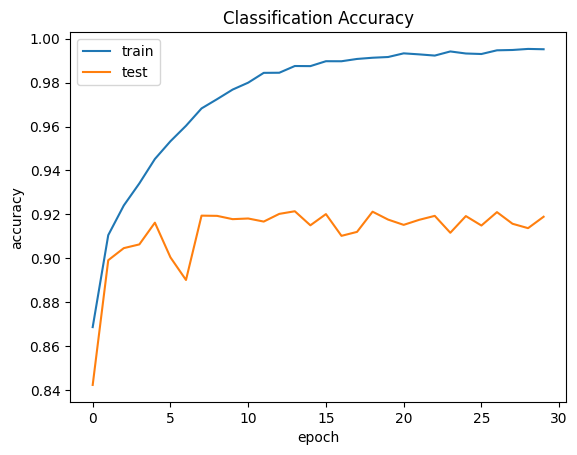

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

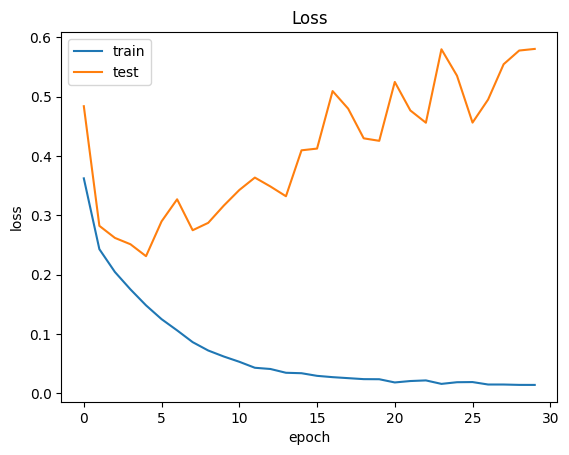

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Practice. CIFAR10 classification

### Import package, dataset

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


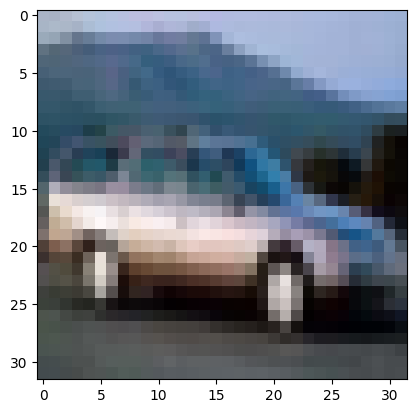

In [33]:
plt.imshow(x_train[4])

### Data preprocessing

In [34]:
from sklearn.preprocessing import LabelBinarizer

x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

### keras sequential API

In [35]:
from keras import layers, models

# input_shape = (32, 32, 3)
# cnn_seq = models.Sequential()

# cnn_seq.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
# cnn_seq.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
# cnn_seq.add(layers.MaxPooling2D((2, 2)))
# cnn_seq.add(layers.Dropout(0.25))

# cnn_seq.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# cnn_seq.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# cnn_seq.add(layers.MaxPooling2D((2, 2)))
# cnn_seq.add(layers.Dropout(0.25))

# cnn_seq.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# cnn_seq.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# cnn_seq.add(layers.MaxPooling2D((2, 2)))
# cnn_seq.add(layers.Dropout(0.25))

# cnn_seq.add(layers.Flatten())
# cnn_seq.add(layers.Dense(256, activation='relu'))
# cnn_seq.add(layers.Dropout(0.5))
# cnn_seq.add(layers.Dense(10, activation='softmax'))

In [36]:
# cnn_seq.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
# cnn_seq.summary()

In [37]:
# 주의: epoch 당 1분, 거의 50분 소요됨
# history = cnn_seq.fit(x_train_scaled, y_train_onehot, validation_data=[x_test_scaled, y_test_onehot], epochs = 10)

In [38]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Classification Accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [39]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

### keras functional API

In [40]:
from keras.engine.input_spec import InputSpec
from keras import layers, models

input_shape = (32, 32, 3)

inputs = layers.Input(shape=input_shape)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

x = layers.Flatten()(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

cnn_func = models.Model(inputs=inputs, outputs=outputs)

In [41]:
cnn_func.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_func.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                           

In [43]:
# 주의: epoch 당 1분, 거의 50분 소요됨
history = cnn_func.fit(x_train_scaled, y_train_onehot, validation_data=[x_test_scaled, y_test_onehot], epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 477s 305ms/step - loss: 1.1110 - accuracy: 0.6061 - val_loss: 0.9414 - val_accuracy: 0.6604
Epoch 2/20
1563/1563 [==============================] - 454s 291ms/step - loss: 1.0122 - accuracy: 0.6420 - val_loss: 0.8661 - val_accuracy: 0.6912
Epoch 3/20
1563/1563 [==============================] - 462s 296ms/step - loss: 0.9450 - accuracy: 0.6671 - val_loss: 0.8792 - val_accuracy: 0.6890
Epoch 4/20
1563/1563 [==============================] - 457s 292ms/step - loss: 0.8968 - accuracy: 0.6854 - val_loss: 0.7897 - val_accuracy: 0.7214
Epoch 5/20
1563/1563 [==============================] - 455s 291ms/step - loss: 0.8620 - accuracy: 0.6986 - val_loss: 0.7944 - val_accuracy: 0.7223
Epoch 6/20
1563/1563 [==============================] - 455s 291ms/step - loss: 0.8273 - accuracy: 0.7121 - val_loss: 0.7697 - val_accuracy: 0.7319
Epoch 7/20
1563/1563 [==============================] - 455s 291ms/step - loss: 0.8008 - accuracy: 0.7183 - val_

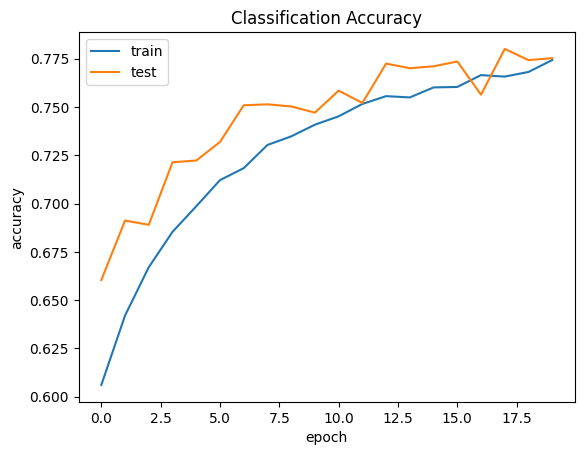

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

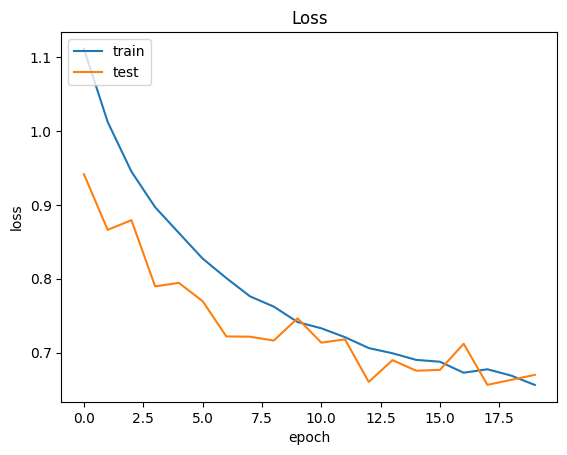

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ResNet

## Practice. Fashion image classification

### Import package, dataset

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

fmnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fmnist.load_data()

### Data preprocessing

In [47]:
from sklearn.preprocessing import LabelBinarizer

x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

x_train_scaled = x_train_scaled.reshape(-1, 28, 28, 1)
x_test_scaled = x_test_scaled.reshape(-1, 28, 28, 1)

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

### Identity block

In [ ]:
# def res_identify(input, filters):
#   x_skip = input
#   f1, f2 = filters

#   x = layers.Conv2D(f1, kernel_size=(1,1), strides=(1,1), padding='valid')(input)
#   x = layers.BatchNormalization()(x)
#   x = layers.Activation('relu')(x)

#   x = layers.Conv2D(f1, kernel_size=(3,3), strides=(1,1), padding='same')(x)
#   x = layers.BatchNormalization()(x)
#   x = layers.Activation('relu')(x)

#   x = layers.Conv2D(f2, kernel_size=(1,1), strides=(1,1), padding='valid')(x)
#   x = layers.BatchNormalization()(x)

#   x = layers.Add()([x, x_skip])
#   x = layers.Activation('relu')(x)

#   return x

### Convolution block

In [ ]:
# def res_conv(input, stride, filters):
#   x_skip = input
#   s = stride
#   f1, f2 = filters

#   x = layers.Conv2D(f1, kernel_size=(1,1), strides=(s,s), padding='valid')(input)
#   x = layers.BatchNormalization()(x)
#   x = layers.Activation('relu')(x)

#   x = layers.Conv2D(f1, kernel_size=(3,3), strides=(1,1), padding='same')(x)
#   x = layers.BatchNormalization()(x)
#   x = layers.Activation('relu')(x)

#   x = layers.Conv2D(f2, kernel_size=(1,1), strides=(1,1), padding='valid')(x)
#   x = layers.BatchNormalization()(x)

#   x_skip = layers.Conv2D(f2, kernel_size=(1,1), strides=(s,s), padding='valid')(x_skip)
#   x_skip = layers.BatchNormalization()(x_skip)

#   x = layers.Add()([x, x_skip])
#   x = layers.Activation('relu')(x)

#   return x

### ResNet50

In [ ]:
# def resnet_50():

#   input = layers.Input(shape=(x_train_scaled.shape[1], x_train_scaled.shape[2], x_train_scaled.shape[3]))
#   x = layers.ZeroPadding2D(padding=(3,3))(input)

#   x = layers.Conv2D(64, kernel_size=(7,7), strides=(2,2))(x)
#   x = layers.BatchNormalization()(x)
#   x = layers.Activation('relu')(x)
#   x = layers.MaxPooling2D((3,3), strides=(2,2))(x)

#   x = res_conv(x, stride=1, filters=(64, 256))
#   x = res_identify(x, filters=(64, 256))
#   x = res_identify(x, filters=(64, 256))

#   x = res_conv(x, stride=2, filters=(128, 512))
#   x = res_identify(x, filters=(128, 512))
#   x = res_identify(x, filters=(128, 512))
#   x = res_identify(x, filters=(128, 512))

#   x = res_conv(x, stride=2, filters=(256, 1024))
#   x = res_identify(x, filters=(256, 1024))
#   x = res_identify(x, filters=(256, 1024))
#   x = res_identify(x, filters=(256, 1024))
#   x = res_identify(x, filters=(256, 1024))
#   x = res_identify(x, filters=(256, 1024))

#   x = res_conv(x, stride=2, filters=(512, 2048))
#   x = res_identify(x, filters=(512, 2048))
#   x = res_identify(x, filters=(512, 2048))

#   x = layers.AveragePooling2D((2,2), padding='same')(x)
#   x = layers.Flatten()(x)
#   output = layers.Dense(y_train_onehot.shape[1], activation='softmax', kernel_initializer='he_normal')(x)

#   model = models.Model(inputs=input, outputs=output)

#   return model

In [ ]:
# ResNet50 = resnet_50()
# ResNet50.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
# ResNet50.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d_3 (ZeroPadding2  (None, 34, 34, 1)   0           ['input_7[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_30 (Conv2D)             (None, 14, 14, 64)   3200        ['zero_padding2d_3[0][0]']       
                                                                                                  
 batch_normalization_12 (BatchN  (None, 14, 14, 64)  256         ['conv2d_30[0][0]']        

In [ ]:
# # 주의: epoch 당 1분, 거의 50분 소요됨
# history = ResNet50.fit(x_train_scaled, y_train_onehot, validation_data=[x_test_scaled, y_test_onehot], epochs = 10)

In [ ]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Classification Accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

## Practice. transfer learning with pretrained ResNet50

### Pretrained ResNet50 with ImageNet dataset

In [48]:
from keras.applications import ResNet50

base_model = ResNet50(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
base_model.trainable = False
base_model.summary()

94765736/94765736 [==============================] - 4s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                          

In [49]:
transfer_model = keras.Sequential([base_model, layers.GlobalAveragePooling2D(), layers.Dense(256, activation='relu'), layers.Dense(10, activation='softmax')])

transfer_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
transfer_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 24,114,826
Trainable params: 527,114
Non-trainable params: 23,587,712
_________________________________________________________________


In [50]:
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0
encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

In [52]:
history = transfer_model.fit(x_train_scaled, y_train_onehot, validation_data=[x_test_scaled, y_test_onehot], epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 284s 182ms/step - loss: 2.0205 - accuracy: 0.2562 - val_loss: 1.8964 - val_accuracy: 0.3264
Epoch 2/20
1563/1563 [==============================] - 315s 202ms/step - loss: 1.8773 - accuracy: 0.3162 - val_loss: 1.8383 - val_accuracy: 0.3191
Epoch 3/20
1563/1563 [==============================] - 316s 202ms/step - loss: 1.8184 - accuracy: 0.3421 - val_loss: 1.7789 - val_accuracy: 0.3685
Epoch 4/20
1563/1563 [==============================] - 318s 203ms/step - loss: 1.7854 - accuracy: 0.3559 - val_loss: 1.7653 - val_accuracy: 0.3688
Epoch 5/20
1563/1563 [==============================] - 315s 202ms/step - loss: 1.7601 - accuracy: 0.3658 - val_loss: 1.7219 - val_accuracy: 0.3853
Epoch 6/20
1563/1563 [==============================] - 322s 206ms/step - loss: 1.7411 - accuracy: 0.3711 - val_loss: 1.7048 - val_accuracy: 0.3846
Epoch 7/20
1563/1563 [==============================] - 316s 202ms/step - loss: 1.7313 - accuracy: 0.3768 - val_

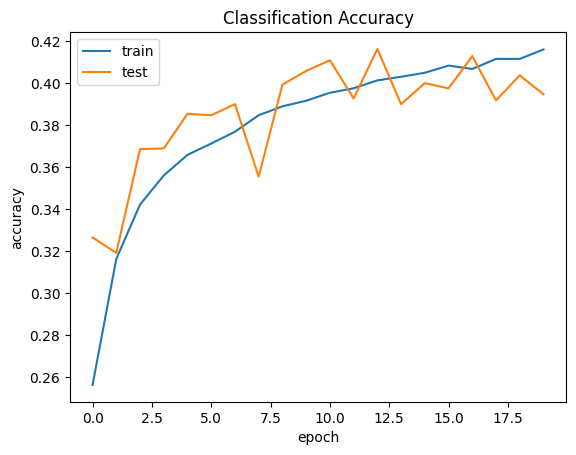

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

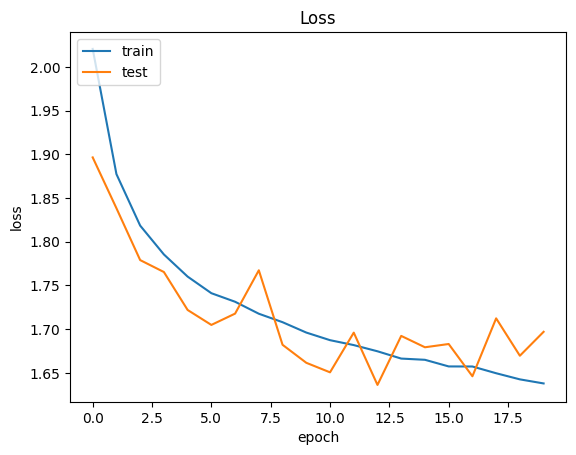

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()